In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("churn_modelling.csv")

### This dataset contains 14 features for about 10K customers of a bank of which 20% of them are churn customers. This dataset can be used for predicting customer churn. We can build a machine learning model to predict if a customer will quit the service of the bank in the next 6 months or not. Predicting customer churn will help banks develop retention compaign and loyalty programs to retain customers.

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,?,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,?,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### We will check the info of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  object 
 8   Balance          10000 non-null  object 
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 1.1+ MB


### From the above info it will seen that tenure and balance are actually numerical column but their data type are showing object. That means there are missing value in both column. We can check that with value_counts.

In [5]:
df['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
?      413
Name: Tenure, dtype: int64

In [6]:
df['Balance'].value_counts()

?            3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: Balance, Length: 6382, dtype: int64

### we will replace the missing value of above two columns with np.nan.

In [7]:
df['Tenure'].replace('?',np.nan,inplace=True)
df['Balance'].replace('?',np.nan,inplace=True)

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,NaN,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,NaN,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Now we will change the datatype of above two column.

In [9]:
df['Tenure']=df['Tenure'].astype(float)
df['Balance']=df['Balance'].astype(float)

### We will check the central tendancy.

In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9587.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.228747,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.756048,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,1.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,8.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### AS there is not much difference in mean and median of Tenure and Balance, we can replace null values of above column with mean.

In [11]:
df['Tenure'].fillna(df['Tenure'].mean(),inplace=True)
df['Balance'].fillna(df['Balance'].mean(),inplace=True)

### We will once again check for null value.

In [12]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,119827.493793,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.860000,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.800000,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,119827.493793,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.820000,1,1,1,79084.10,0


### We will check corelation between the variable.

In [14]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006079,-0.003796,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.013160,-0.006942,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.002157,-0.003801,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.008695,-0.010232,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006079,-0.013160,0.002157,-0.008695,1.000000,0.004355,0.002424,0.014268,-0.027969,0.011521,-0.009775
Balance,-0.003796,-0.006942,-0.003801,-0.010232,0.004355,1.000000,-0.000814,0.005403,-0.016314,-0.001480,0.014595
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.002424,-0.000814,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.014268,0.005403,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.027969,-0.016314,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.011521,-0.001480,0.014204,-0.009933,-0.011421,1.000000,0.012097


### From above information RowNumber, CustomerId, Tenure and HasCrCard are low corelated to target column so we can drop those column as well with domain knowlede Surname column also do not having any effect on target column so we can drop that column also. 

In [15]:
df.drop(['RowNumber','CustomerId','Surname','Tenure','HasCrCard'],axis=1,inplace=True)

In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,119827.493793,1,1,101348.88,1
1,608,Spain,Female,41,83807.860000,1,1,112542.58,0
2,502,France,Female,42,159660.800000,3,0,113931.57,1
3,699,France,Female,39,119827.493793,2,0,93826.63,0
4,850,Spain,Female,43,125510.820000,1,1,79084.10,0


### We will seperate categoracal and numerical column.

In [17]:
df_num=df.select_dtypes(['int','float'])
df_cat=df.select_dtypes(object)

In [18]:
df_num.head()

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,42,119827.493793,1,1,101348.88,1
1,608,41,83807.860000,1,1,112542.58,0
2,502,42,159660.800000,3,0,113931.57,1
3,699,39,119827.493793,2,0,93826.63,0
4,850,43,125510.820000,1,1,79084.10,0


In [19]:
df_cat.head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


### We will perform labelencoding on categorical column

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df_cat:
    df_cat[i]=le.fit_transform(df_cat[i])

In [21]:
df_cat.head()

,Geography,Gender
0,0,0
1,2,0
2,0,0
3,0,0
4,2,0


### We will concatnate cat and num column

In [22]:
df=pd.concat([df_cat,df_num],axis=1)

In [23]:
df.head()

,Geography,Gender,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,0,0,619,42,119827.493793,1,1,101348.88,1
1,2,0,608,41,83807.860000,1,1,112542.58,0
2,0,0,502,42,159660.800000,3,0,113931.57,1
3,0,0,699,39,119827.493793,2,0,93826.63,0
4,2,0,850,43,125510.820000,1,1,79084.10,0


### We will now seperate the x and y

In [24]:
x=df.iloc[:,:-1]
x

,Geography,Gender,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,EstimatedSalary
0,0,0,619,42,119827.493793,1,1,101348.88
1,2,0,608,41,83807.860000,1,1,112542.58
2,0,0,502,42,159660.800000,3,0,113931.57
3,0,0,699,39,119827.493793,2,0,93826.63
4,2,0,850,43,125510.820000,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,0,1,771,39,119827.493793,2,0,96270.64
9996,0,1,516,35,57369.610000,1,1,101699.77
9997,0,0,709,36,119827.493793,1,1,42085.58
9998,1,1,772,42,75075.310000,2,0,92888.52


In [25]:
y=df.iloc[:,-1]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

### We will slpit the data and build the model

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [27]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

### As our problem is of binary classification and logistic regression is best for binary classification so we go for logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      2373
           1       0.30      0.03      0.05       627

    accuracy                           0.78      3000
   macro avg       0.54      0.51      0.46      3000
weighted avg       0.69      0.78      0.70      3000



In [30]:
confusion_matrix(ytest,ypred)

array([[2330,   43],
       [ 609,   18]], dtype=int64)

### The accuracy of the model is 78%. We van check the prediction of model.

In [32]:
a=int(input("enter the value of Geography "))                      # range (0-2)
b= int(input("enter the value of Gender "))                        # range (0-1)
c=float(input("enter the value of creditscore "))                  # range (350-850)
d=int(input("enter the value of Age "))                            # range (18-92)
e=float(input("enter the value of Balance "))                      # range (3768-250898)
f=int(input("enter the value of number of product "))              # range (1-4)
g=float(input("enter the value of estmsted salary "))              # range (11-200000)
h=int(input("enter the value of isactivemember "))                 # range (0-1)

m=lr.predict([[a,b,c,d,e,f,g,h]])[0]
print("The new customer will classify in ",m,"Class")   

enter the value of Geography 1
enter the value of Gender 1
enter the value of creditscore 450.2
enter the value of Age 45
enter the value of Balance 60252.2
enter the value of number of product 3
enter the value of estmsted salary 80245.5
enter the value of isactivemember 1
The new customer will classify in  0 Class


### We will increase the recall of class 1 by hypertunning the model.

In [33]:
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
lr.predict_proba(xtest)

array([[0.67182001, 0.32817999],
       [0.87168831, 0.12831169],
       [0.70555565, 0.29444435],
       ...,
       [0.91757482, 0.08242518],
       [0.880298  , 0.119702  ],
       [0.84978254, 0.15021746]])

In [35]:
prob=lr.predict_proba(xtest)[:,-1]

In [36]:
prob

array([0.32817999, 0.12831169, 0.29444435, ..., 0.08242518, 0.119702  ,
       0.15021746])

In [37]:
np.where(prob>=0.5,1,0)

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
threshold=[0.5,0.4,0.3,0.2,0.1]
tprs=[]
fprs=[]

In [39]:
for i in threshold:
    ypredprob=np.where(prob>=i,1,0)
    
    tn,fp,fn,tp=confusion_matrix(ytest,ypredprob).ravel()
    tpr=tp/(tp+fn)
    fpr=fp/(tn+fp)
    tprs.append(tpr)
    fprs.append(fpr)

In [40]:
tprs

[0.028708133971291867,
 0.11004784688995216,
 0.3062200956937799,
 0.6586921850079744,
 0.9617224880382775]

In [41]:
fprs

[0.018120522545301308,
 0.04382638010956595,
 0.11925832279814581,
 0.35103244837758113,
 0.8807416772018541]

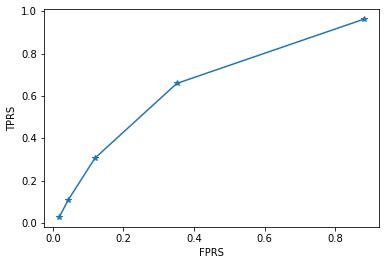

In [42]:
plt.plot(fprs,tprs,"-*")
plt.xlabel("FPRS")
plt.ylabel("TPRS")
plt.show()

In [43]:
ypred=np.where(prob>0.1,1,0)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.92      0.12      0.21      2373
           1       0.22      0.96      0.36       627

    accuracy                           0.30      3000
   macro avg       0.57      0.54      0.29      3000
weighted avg       0.78      0.30      0.24      3000



In [44]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest,ypred)

0.5404904054182117

### We can again check the new customer will classify in which class after hypertunning.

In [45]:
a=int(input("enter the value of Geography "))                      # range (0-2)
b= int(input("enter the value of Gender "))                        # range (0-1)
c=float(input("enter the value of creditscore "))                  # range (350-850)
d=int(input("enter the value of Age "))                            # range (18-92)
e=float(input("enter the value of Balance "))                      # range (3768-250898)
f=int(input("enter the value of number of product "))              # range (1-4)
g=float(input("enter the value of estmsted salary "))              # range (11-200000)
h=int(input("enter the value of isactivemember "))                 # range (0-1)

m=lr.predict([[a,b,c,d,e,f,g,h]])[0]
print("The new customer will classify in ",m,"Class")   

enter the value of Geography 1
enter the value of Gender 1
enter the value of creditscore 652.2
enter the value of Age 36
enter the value of Balance 75368.2
enter the value of number of product 3
enter the value of estmsted salary 96252.5
enter the value of isactivemember 1
The new customer will classify in  0 Class


## The prediction of model before and after hypertunning is same. We can conclude that the customer will not quit the service of the bank in next 6 months.